 Versuch 1
 ======
 
 Thema
 ------

In diesem Versuch wird ein CNN trainiert. Ziel ist die Klassifizierung von Bildern   
in zwei Klassen. Dies sind unbefestigte oder befestigte Wege. Hierfür verwende ich relativ einfache Methoden.   
Es geht darum einen ersten Versuch für eine Klassifizierung von Fahrradwegen zu unternehmen.

 Versuchsaufbau
 ------
 
Als Bibliothekt wird Keras mit Tensorflow als Backend verwendet.
Die Trainingsdaten wurden manuell gelabelt und stammen aus dem Datensatz Nummer vier.   
Siehe auch die Excel Datei Beschreibung der Datensätze.
In der folgenden Tabelle gibt es einen Überblick über die verwendeten Bilder. 

**Anzahl der Bilder **|**Klassen**|**Kameraauflösung**|**Größe des Ausschnitts**| |**Bildgröße reduziert**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
2000|unbefestigt(664 Bilder), befestigt (1336)|960px x 1280px|450px x 600px| |108px x 144px

Das verwendete CNN hat die folgenden Parameter.

**Anzahl der Conv-Layer**|**Dense-Layer**|**Aktivierungsfunktion**|**Regularisierung **|**Optimierer **
:-----:|:-----:|:-----:|:-----:|:-----:
2|2|ReLu|Dropout|RMSprop

 Ergebnis
 ------

In [19]:
import tensorflow
tensorflow.__version__

'1.2.1'

In [20]:
import os
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import seaborn
import numpy as np
import pandas

In [44]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [22]:
# Um Grafiken zu plotten
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [23]:
# dirs beinhaltet eine List mit allen Dateien des angegebenen Ordners
path = os.getcwd()
image_path = path + '/images'
dirs = os.listdir(image_path)

In [24]:
# Anzahl der Farbkanäle
numberOfChannels = 1
# Lade alle Bider des angegebenen Ordners in eine Liste
images=[]
for file in dirs:
    if "jpg" not in file:   
        continue
    input_img=cv2.imread(image_path + '/'+ file, cv2.IMREAD_GRAYSCALE )
    images.append(input_img)
img_data = np.array(images)
img_data = img_data.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
img_data /= 255
print (img_data.shape)

(2000, 144, 108)


In [25]:
# Für Tensorflow Backend müssen die Anzahl der Farbkanäle als letzte Dimension angegeben werden in dem Array
img_data= img_data[:,np.newaxis]
img_data=np.rollaxis(img_data,numberOfChannels,4)
print (img_data.shape)

(2000, 144, 108, 1)


In [26]:
numberOfClasses = 2
num_of_samples = img_data.shape[0]
labelsNp = np.ones((num_of_samples,),dtype='int32')

In [27]:
# Lade CSV Datei mit den enthaltenen Features
dfFeatures = pandas.read_csv(filepath_or_buffer="features.csv") 
dfFeatures.drop(columns=['Unnamed: 0'], inplace=True)
dfFeatures.head(5)

,0,1517406329935,53.613636,53.613636.1,2.43,Klasse
0,0,1517406329935,53.613636,53.613636.1,2.430,0
1,0,1517406330272,53.613636,53.613636,4.860,0
2,1,1517406330561,53.613636,53.613636,4.860,0
3,2,1517406330997,53.613632,53.613632,6.264,0
4,3,1517406331103,53.613632,53.613632,7.668,0


In [28]:
# Von den Dataframe wird die letzte Spalte selektiert
labelsNp = dfFeatures.iloc[:,-1]
labelsNp.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Klasse, dtype: int64

In [29]:
# Name der zwei Klassen
classNames = ['befestigt','unbefestigt']

In [30]:
# Erstellt einen "one hot encoding" für die gelabelten Daten
Y = np_utils.to_categorical(labelsNp, 0)

In [31]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(9)

In [32]:
# Mischen der Trainingsdaten
x,y = shuffle(img_data,Y)
# Aufteilung in Trainings und Testdaten
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
# Parameter für das CNN
input_shape=img_data[0].shape
numNeurons_C1  = 32     
numNeurons_C2  = 64     
numNeurons_D1  = 64    
convKernelSize = 3      

In [34]:
model = Sequential()

model.add(Conv2D(numNeurons_C1, (convKernelSize, convKernelSize), padding='valid',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(numNeurons_C2, (convKernelSize, convKernelSize)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(numNeurons_D1))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(numberOfClasses))
model.add(Activation('softmax'))

In [35]:
# Zusammenfassung des neuralen Netzes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 142, 106, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 142, 106, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 71, 53, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 71, 53, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 51, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 69, 51, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 25, 64)        0         
__________

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [37]:
num_epoch=4
hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/4
1600/1600 [==============================] - 36s 22ms/step - loss: 2.7535 - acc: 0.6581 - val_loss: 0.6489 - val_acc: 0.6575
Epoch 2/4
1600/1600 [==============================] - 36s 22ms/step - loss: 0.6005 - acc: 0.7025 - val_loss: 0.5864 - val_acc: 0.8225
Epoch 3/4
1600/1600 [==============================] - 43s 27ms/step - loss: 0.4649 - acc: 0.8256 - val_loss: 0.4250 - val_acc: 0.8650
Epoch 4/4
1600/1600 [==============================] - 37s 23ms/step - loss: 0.4084 - acc: 0.8500 - val_loss: 0.3508 - val_acc: 0.8750


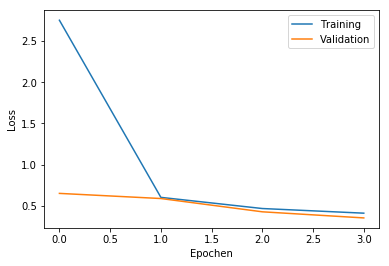

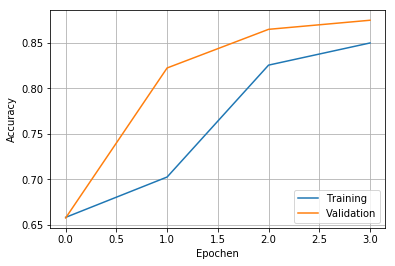

In [39]:
plt.figure(4)
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure(1)
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)

plt.show()

In [61]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.35076105535
Test accuracy: 0.875


In [62]:
test_image = X_test[2:3]
print (test_image.shape)
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[2:3])

(1, 144, 108, 1)
[[ 0.88382787  0.11617222]]
1/1 [==============================] - 0s 8ms/step
[0]
[[ 1.  0.]]


In [79]:
valid_preds = model.predict(X_test)
valid_preds = np.argmax(valid_preds, axis=1)
y_test_max = np.argmax(y_test,axis=1)

In [104]:
# Konfusionsmatrix
cnf_matrix = confusion_matrix(y_test_max, valid_preds)
print(cnf_matrix)

[[262   1]
 [ 49  88]]


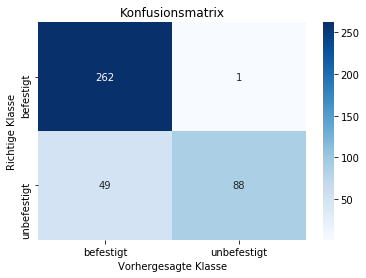

In [105]:
ax = seaborn.heatmap(cnf_matrix, fmt="d", cmap=plt.cm.Blues,  annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Richtige Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.show();